# Compute frequency response of analog filter

In [13]:
from scipy import signal 
import numpy as np

import slycot

In [14]:
A = np.array([[0.0, 1.0], [-0.5, -0.1]])
B = np.array([[0.0], [1.0]])
C = np.array([[1.0, 0.0]])
D = np.zeros((1,1))

sys_ss = signal.lti(A,B,C,D)
sys_tf = signal.ss2tf(A,B,C,D)
num, den = sys_tf

In [15]:
w, H = signal.freqs(num.squeeze(), den)

In [16]:
len(w)

200

In [17]:

real_H_resp = np.expand_dims(np.real(H), axis=(1))
imag_H_resp = np.expand_dims(np.imag(H), axis=(1))

In [18]:
imag_H_resp.shape

(200, 1)

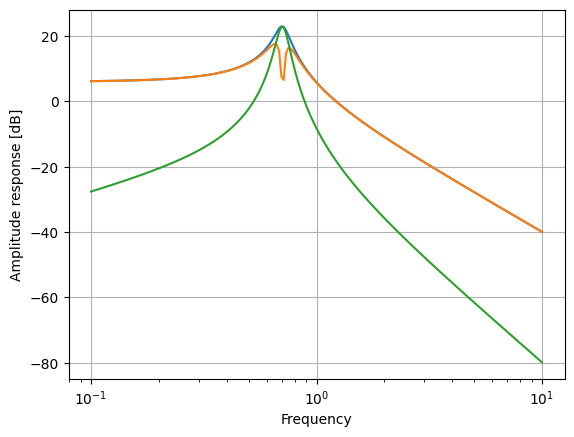

In [19]:
import matplotlib.pyplot as plt
plt.semilogx(w, 20 * np.log10(abs(H)))
plt.semilogx(w, 20 * np.log10(abs(np.real(H))))
plt.semilogx(w, 20 * np.log10(abs(np.imag(H))))
plt.xlabel('Frequency')
plt.ylabel('Amplitude response [dB]')
plt.grid(True)
plt.show()

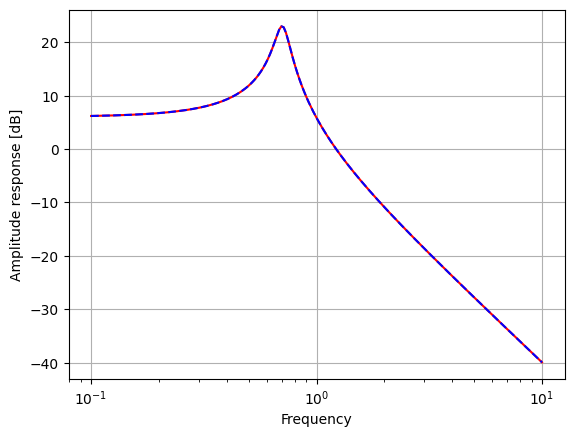

In [20]:
import matplotlib.pyplot as plt
plt.semilogx(w, 20 * np.log10(abs(H)), 'r')
plt.semilogx(w, 20 * (np.log10(abs(np.sqrt(np.real(H)**2 + np.imag(H)**2))) ), 'b--')
plt.xlabel('Frequency')
plt.ylabel('Amplitude response [dB]')
plt.grid(True)
plt.show()

In [21]:
omega = w
n = 2
nid, Aid, Bid, Cid, Did = slycot.sb10yd(0, 0, len(omega), real_H_resp, imag_H_resp, omega, 
                               n, tol=0)

print(Aid.shape)
#Bid = np.expand_dims(Bid, axis=1)
print(Bid.shape)
#Cid = np.expand_dims(Cid, axis=0)
print(Cid.shape)
print(Did.shape)

(2, 2)
(2, 1)
(1, 2)
(1,)


In [24]:
sys_tf_id = signal.ss2tf(Aid,Bid,Cid,Did)
num_id, den_id = sys_tf_id
w_id, H_id = signal.freqs(num_id.squeeze(), den_id, worN=w)

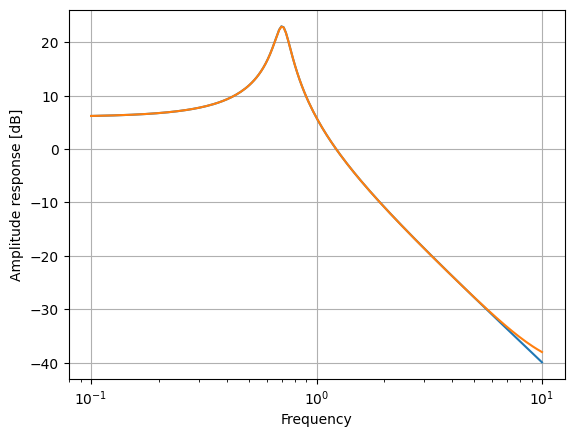

In [26]:
import matplotlib.pyplot as plt
plt.semilogx(w, 20 * np.log10(abs(H)))
plt.semilogx(w_id, 20 * np.log10(abs(H_id)))
plt.xlabel('Frequency')
plt.ylabel('Amplitude response [dB]')
plt.grid(True)
plt.show()

In [68]:
np.max(abs(H_id) - abs(H))

0.00248676299600057

In [71]:
np.testing.assert_allclose(abs(H_id),abs(H),rtol=0.3,atol=0)